In [3]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [4]:
#read csv documents of relevant data
Closed=pd.read_csv('olist_closed_deals_dataset.csv')
Customers=pd.read_csv('olist_customers_dataset.csv')
Geo=pd.read_csv('olist_geolocation_dataset.csv')
MQL=pd.read_csv('olist_marketing_qualified_leads_dataset.csv')
Items=pd.read_csv('olist_order_items_dataset.csv')
Payments=pd.read_csv('olist_order_payments_dataset.csv')
Reviews=pd.read_csv('olist_order_reviews_dataset.csv')
Orders=pd.read_csv('olist_orders_dataset.csv')
Products=pd.read_csv('olist_products_dataset.csv')
Sellers=pd.read_csv('olist_sellers_dataset.csv')
Translation=pd.read_csv('product_category_name_translation.csv')
Zip=pd.read_csv('csvData.csv')

In [5]:
#print shapes of data. Items is the most granular level of data 
datasets=[Closed,Customers,Geo,MQL,Items,Payments,Reviews,Orders,Products,Sellers,Translation]
data_shape=[i.shape for i in datasets]
print(data_shape)


[(842, 14), (99441, 5), (1000163, 5), (8000, 4), (112650, 7), (103886, 5), (100000, 7), (99441, 8), (32951, 9), (3095, 4), (71, 2)]


In [6]:
#Data Wrangling-enforce matching between city names between dsatasets from two different sources
Zip_str=Zip.name
cust_city=Customers.customer_city
lower_zip=[i.lower() for i in Zip_str]
lz=[]
for i in cust_city:
    if i in lower_zip:
        lz.append(i)
    else:
        continue

In [7]:
#data wrangling- Convert Zip.name to lowercase
Zip.name=[i.lower() for i in Zip.name]

In [8]:
#merge all relevant purchasing data variables for further analysis
V1=pd.merge(Items,Products,on='product_id',how='left')
V2=pd.merge(V1,Sellers,on='seller_id',how='left')
V3=pd.merge(V2,Orders,on='order_id',how='left')
V4=pd.merge(V3,Translation,on='product_category_name',how='left')
V5=pd.merge(V4,Payments,on='order_id',how='left')
V6=pd.merge(V5,Customers,on='customer_id',how='left')
Purchase_Data=pd.merge(V6,Zip,left_on='customer_city',right_on='name',how='left')

In [9]:
print(Purchase_Data.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name_english',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'name', 'pop', 'location'],
      dtype='object')


In [10]:
#merge all relevant ordering data variables for further analysis
W1=pd.merge(Orders,Payments,on='order_id',how='left')
W2=pd.merge(W1,Reviews,on='order_id',how='left')
Review_Data=W2

In [11]:
CBS=pd.DataFrame(pd.pivot_table(Purchase_Data,values='price',index=['customer_id','customer_city'],
                                aggfunc=np.sum)).reset_index()
print(CBS)

                            customer_id    customer_city   price
0      00012a2ce6f8dcda20d059ce98491703           osasco   89.80
1      000161a058600d5901f007fab4c27140      itapecerica   54.90
2      0001fd6190edaaf884bcaf3d49edf079     nova venecia  179.99
3      0002414f95344307404f0ace7a26f1d5         mendonca  149.90
4      000379cdec625522490c315e70c7a9fb        sao paulo   93.00
...                                 ...              ...     ...
98661  fffcb937e9dd47a13f05ecb8290f4d3e        sao paulo   78.00
98662  fffecc9f79fd8c764f843e9951b11341           parobe  164.70
98663  fffeda5b6d849fbd39689bb92087f431   rio de janeiro   47.90
98664  ffff42319e9b2d713724ae527742af25  taboao da serra  199.90
98665  ffffa3172527f765de70084a7e53aae8          alfenas   21.80

[98666 rows x 3 columns]


In [12]:
Customer_City=pd.merge(CBS,Zip,left_on='customer_city',right_on='name',how='left')
Customer_City_2=pd.DataFrame(pd.pivot_table(Customer_City,values='price',index=['customer_city','pop'],
                               aggfunc=['count',np.sum])).reset_index()
Customer_City_2.columns=Customer_City_2.columns.droplevel()
Customer_City_2.columns=['City','Population','Unique_Customers','Total_Revenue']
Customer_City_2['Avg_Customer_Value']=Customer_City_2['Total_Revenue']/Customer_City_2['Unique_Customers']
print(Customer_City_2)

                       City  Population  Unique_Customers  Total_Revenue  \
0                abaetetuba     78050.0                11        4058.47   
1              abreu e lima     81959.0                11        2376.95   
2                alagoinhas    122688.0                40        6894.02   
3                  alegrete     87236.0                35        4483.77   
4                   alfenas     71406.0                43        5497.31   
..                      ...         ...               ...            ...   
388    vitoria da conquista    253137.0                90       16711.08   
389  vitoria de santo antao    107383.0                15        2455.15   
390           volta redonda    249580.0               228       34353.35   
391              votorantim     99390.0                85       11555.70   
392             votuporanga     69863.0                63        8372.90   

     Avg_Customer_Value  
0            368.951818  
1            216.086364  
2        

(0.9552448101713025, 6.238239082750311e-209)


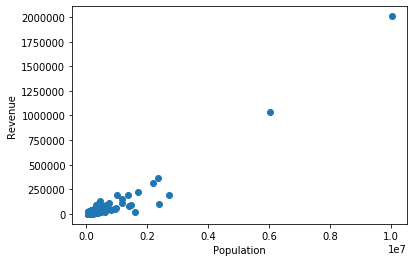

In [13]:
#Data Story-Visualization for population impact on total revenue. There is clearly a positive correlation, but 
#the cities with revenue above $1,000,000 reduce the level of detail we can see in the majority of cities. The two variables
#Have a pearson correlation coefficient of .95 and p-value of 6.2e-209, indicating a strong relationship
plt.scatter(Customer_City_2.Population,Customer_City_2.Total_Revenue)
plt.xlabel('Population')
plt.ylabel('Revenue')
print(ss.pearsonr(Customer_City_2.Population,Customer_City_2.Total_Revenue))

In [14]:
#Data wrangling
#define function to remove values from two-column dataframe if either row has a value greater than six standard deviations
#from the mean
a=Customer_City_2.iloc[:,[1,3]]
def remove_outliers(frame):
    var_1=frame.iloc[:,0]
    var_2=frame.iloc[:,1]
    std_1=var_1.std()
    std_2=var_2.std()
    avg_1=var_1.mean()
    avg_2=var_2.mean()
    vec_1=[]
    for i in range(len(a)):
        if frame.iloc[i,0]>avg_1+std_1*6 or frame.iloc[i,1]>avg_2+std_2*6:
            continue
        else:
            vec_1.append(i)
    return(frame.iloc[vec_1,:])
Customer_City_Outliers_Removed=remove_outliers(a)

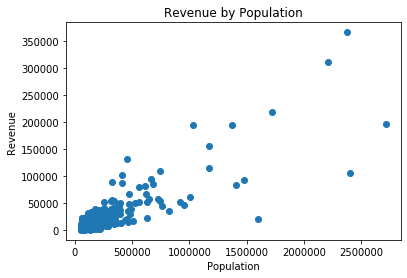

(0.847648958762663, 3.9715206796083605e-109)


In [15]:
#Data Story/Inferential Statitstics 
#The two cities whith revenue over 1,000,000 are removed to get a better look at the
#relationship between revenue and population for the remainder of the cities. The correlation and p-value indicate a
#less-strong relationship with the removal of the two high population and high revenue cities
Customer_City_3=Customer_City_2[Customer_City_2.Total_Revenue<1000000]
plt.scatter(Customer_City_Outliers_Removed.iloc[:,0],Customer_City_Outliers_Removed.iloc[:,1])
plt.xlabel('Population')
plt.ylabel('Revenue')
plt.title('Revenue by Population')
plt.show()
print(ss.pearsonr(Customer_City_Outliers_Removed.Population,Customer_City_3.Total_Revenue))


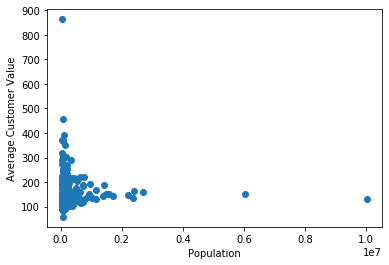

(-0.03711813008063989, 0.46310278940426075)


In [16]:
#Data Storytelling-The relationship between population and total revenue is probably something we can intuit, but
#does population have an impact on average individual customer value? The idea here is that people who live in more
#populous cities may have more disposable income or may be more predisposed toward ordering products online
plt.scatter(Customer_City_2.Population,Customer_City_2.Avg_Customer_Value)
plt.xlabel('Population')
plt.ylabel('Average Customer Value')
plt.show()
print(ss.pearsonr(Customer_City_2.Population,Customer_City_2.Avg_Customer_Value))

(-0.024762526606725652, 0.625885769834042)


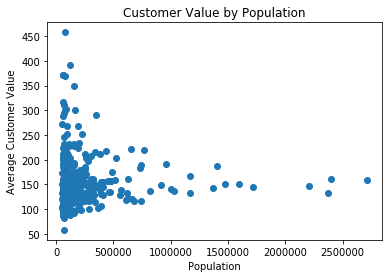

In [17]:
#Storytelling/Inferential Statistics
#The excessively high values once again skew our visualization. We can see more clearly if we eliminate these cities
#from the scatter plot. There still seems to be no relationship between city population and average customer value
Avg_Cust_Value_RO=remove_outliers(Customer_City_2[['Population','Avg_Customer_Value']])
plt.scatter(Avg_Cust_Value_RO.Population,Avg_Cust_Value_RO.Avg_Customer_Value)
plt.xlabel('Population')
plt.ylabel('Average Customer Value')
plt.title('Customer Value by Population')
print(ss.pearsonr(Avg_Cust_Value_RO.Population,Avg_Cust_Value_RO.Avg_Customer_Value))

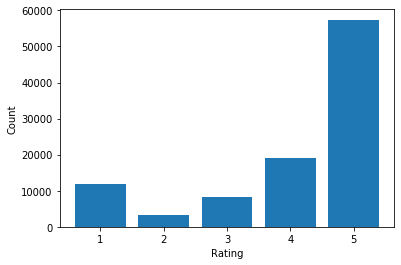

In [18]:
#Data Storytelling
#distribution of reviews for each rating
Review_dist=pd.DataFrame(pd.pivot_table(Reviews,values='order_id',columns=['review_score'],aggfunc='count'))
RD=Review_dist.transpose().reset_index()
plt.bar(RD.review_score,RD.order_id)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [19]:
#Storytelling- Percentage breakdown of review score
RD2=RD
RD2['Percentage']=RD2.order_id/sum(RD2.order_id)
print(RD2)

   review_score  order_id  Percentage
0             1     11858     0.11858
1             2      3235     0.03235
2             3      8287     0.08287
3             4     19200     0.19200
4             5     57420     0.57420


In [20]:
#Data wrangling/storytelling
#Joining the customer_city and review average per city to see if that impacts average customer value
Orders_With_Reviews=pd.merge(Purchase_Data,Reviews,on='order_id',how='left')
City_Pop_Reviews=pd.DataFrame(pd.pivot_table(Orders_With_Reviews,values='review_score',
                            index=['name'],aggfunc=np.mean)).reset_index()
Customer_City_Reviews=pd.merge(Customer_City_2,City_Pop_Reviews,left_on='City',right_on='name',how='left')

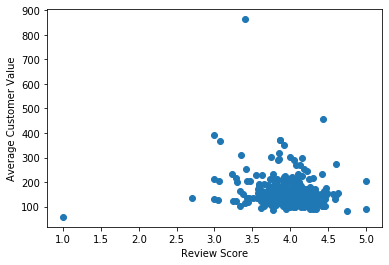

(-0.14658342631933452, 0.003586699897603373)


In [21]:
#Data Storytrelling/inferential statistics
#Reviews have no bearing on customer value, likely because repeat customers make up a small percentage of
#overall orders
plt.scatter(Customer_City_Reviews.review_score,Customer_City_Reviews.Avg_Customer_Value)
plt.xlabel('Review Score')
plt.ylabel('Average Customer Value')
plt.show()
print(ss.pearsonr(Customer_City_Reviews.review_score,Customer_City_Reviews.Avg_Customer_Value))

In [22]:
#Data Storytelling - Top and bottom 5 categories by average product rating
Reviews_By_Product_Category=pd.DataFrame(pd.pivot_table(Orders_With_Reviews,values=['review_score','order_id'],
                                                        index='product_category_name_english',
                                                        aggfunc={'review_score':np.mean,'order_id':'count'}))
Reviews_By_Product_Category.rename(columns={'order_id':'Count','review_score':'Average Review Score'},inplace=True)
print(Reviews_By_Product_Category.sort_values(by=['Average Review Score'],ascending=False).head())
print(Reviews_By_Product_Category.sort_values(by=['Average Review Score'],ascending=False).tail())

                               Count  Average Review Score
product_category_name_english                             
cds_dvds_musicals                 14              4.642857
fashion_childrens_clothes          8              4.500000
books_general_interest           565              4.431858
books_imported                    62              4.419355
books_technical                  272              4.345588
                               Count  Average Review Score
product_category_name_english                             
fashion_male_clothing            145              3.531034
office_furniture                1788              3.516779
home_comfort_2                    31              3.387097
diapers_and_hygiene               39              3.256410
security_and_services              2              2.500000


                               Total Revenue  Revenue Percentage
product_category_name_english                                   
health_beauty                     1297761.15            9.253372
watches_gifts                     1254577.20            8.945460
bed_bath_table                    1093842.41            7.799379
sports_leisure                    1024909.58            7.307870
computers_accessories              942487.27            6.720178
                               Total Revenue  Revenue Percentage
product_category_name_english                                   
flowers                              1110.04            0.007915
home_comfort_2                        773.17            0.005513
cds_dvds_musicals                     730.00            0.005205
fashion_childrens_clothes             569.85            0.004063
security_and_services                 283.29            0.002020


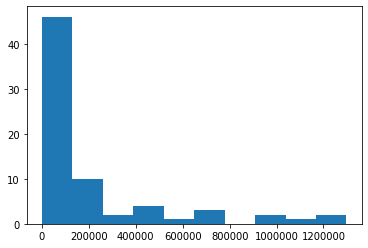

In [23]:
#data storytelling-revenue per category and percentage of total revenue
Product_Category_Revenue=pd.DataFrame(pd.pivot_table(Purchase_Data,values='price',
                        index='product_category_name_english',aggfunc=np.sum)).rename(columns={'price':'Total Revenue'})
#print(Product_Category_Revenue)
Product_Category_Revenue['Revenue Percentage']=Product_Category_Revenue['Total Revenue']*100/sum(Product_Category_Revenue['Total Revenue'])
PC2=Product_Category_Revenue.style.format({'Total Revenue':'${:20,.0f}'})
print(Product_Category_Revenue.sort_values(by='Total Revenue',ascending=False).head())
print(Product_Category_Revenue.sort_values(by='Total Revenue',ascending=False).tail())
plt.hist(Product_Category_Revenue['Total Revenue'])
plt.show()

In [25]:
#Data Storytelling-Formatted version of above information. The highest revenue-driving category makes up roughly 10% of 
#total revenue
Product_Category_Revenue.sort_values(by=['Total Revenue'],
                                     ascending=False).style.format({'Total Revenue':'${:20,.0f}',
                                                                    'Revenue Percentage':'%{:,.1f}'})

,Total Revenue,Revenue Percentage
product_category_name_english,,
health_beauty,"$ 1,297,761",%9.3
watches_gifts,"$ 1,254,577",%8.9
bed_bath_table,"$ 1,093,842",%7.8
sports_leisure,"$ 1,024,910",%7.3
computers_accessories,"$ 942,487",%6.7
furniture_decor,"$ 765,320",%5.5
housewares,"$ 666,983",%4.8
cool_stuff,"$ 662,655",%4.7
auto,"$ 616,989",%4.4


In [26]:
#Storytelling-There are 12,526 customers that have ordered through olist more than once
Return_Customers=pd.DataFrame(Purchase_Data.groupby(['customer_id'])[['order_item_id']].count())
print(Return_Customers)
print(len(Return_Customers[Return_Customers.order_item_id>1]))

                                  order_item_id
customer_id                                    
00012a2ce6f8dcda20d059ce98491703              1
000161a058600d5901f007fab4c27140              1
0001fd6190edaaf884bcaf3d49edf079              1
0002414f95344307404f0ace7a26f1d5              1
000379cdec625522490c315e70c7a9fb              1
...                                         ...
fffcb937e9dd47a13f05ecb8290f4d3e              1
fffecc9f79fd8c764f843e9951b11341              3
fffeda5b6d849fbd39689bb92087f431              1
ffff42319e9b2d713724ae527742af25              1
ffffa3172527f765de70084a7e53aae8              2

[98666 rows x 1 columns]
12526


In [28]:
#Create binary variable of return or one-time customer
Repeat_Customer=[]
for i in Return_Customers.order_item_id:
    if i >1:
        Repeat_Customer.append(1)
    else:
        Repeat_Customer.append(0)
Return_Customers['Repeat_Customer']=Repeat_Customer   

In [29]:
Return_Customers_2=pd.merge(Orders_With_Reviews,Return_Customers,on='customer_id',how='left')
print(Purchase_Data.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name_english',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'name', 'pop', 'location'],
      dtype='object')


In [30]:
Return_Customers_3=Return_Customers_2[['review_score','Repeat_Customer']]

In [31]:
#Counterintuitively, products purchased by return customers have a lower average rating than single-purchase customers. It
#is important to note that the "repeat customers" category includes both first and subsequent purchases by those customers 
Return=Return_Customers_3[Return_Customers_3['Repeat_Customer']==1]
One_Time=Return_Customers_3[Return_Customers_3['Repeat_Customer']==0]
print(np.mean(Return['review_score']),np.mean(One_Time['review_score']))

3.6539284141661947 4.146768122300995


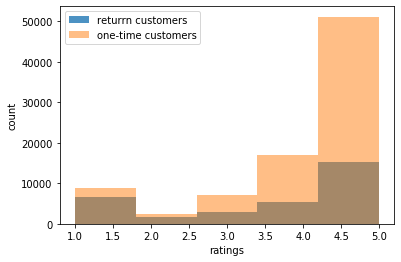

Average return customer product rating is 3.65
Average one-time customer product rating 4.15
20.94% of return customer purchases were rated as 1
10.14% of one-time customers purchases were rated as 1


In [32]:
#The driver of lower average is a proportionately higer number of 1 star reviews for return customers
plt.hist(Return['review_score'],bins=5,alpha=.8,label='returrn customers')
plt.hist(One_Time['review_score'],bins=5,alpha=.5,label='one-time customers')
plt.xlabel('ratings')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.show()
RC=np.round(np.mean(Return['review_score']),2)
OTC=round(np.mean(One_Time['review_score']),2)
One_Ratings_RC=len(Return[Return['review_score']==1])/len(Return)
One_Ratings_OTC=len(One_Time[One_Time['review_score']==1])/len(One_Time)
print("Average return customer product rating is {:.2f}".format(RC))
print("Average one-time customer product rating {:.2f}".format(OTC))
print("{:.2%} of return customer purchases were rated as 1".format(One_Ratings_RC))
print("{:.2%} of one-time customers purchases were rated as 1".format(One_Ratings_OTC))

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
Review_Vector=Review_Data.review_comment_message
vectorizer=CountVectorizer(min_df=0,lowercase=False)
#RV_Filtered=Review_Vector[Review_Vector != Review_Vector[4]]
RV_Filtered=pd.DataFrame(filter(lambda x:x==x,Review_Vector))
rv_lst=[]
for i in RV_Filtered.iloc[:,0]:
    rv_lst.append(i)


In [34]:
RD_NLP=Review_Data[['review_score','review_comment_message']]
print(RD_NLP.head())

   review_score                             review_comment_message
0             4  Não testei o produto ainda, mas ele veio corre...
1             4  Não testei o produto ainda, mas ele veio corre...
2             4  Não testei o produto ainda, mas ele veio corre...
3             4                               Muito bom o produto.
4             5                                                NaN


In [35]:
RD_NLP_2=RD_NLP[RD_NLP['review_comment_message'].notnull()]

In [38]:
trmat=vectorizer.fit_transform(train1['review_comment_message'])
trmat_2=trmat.tocsc()
tsmat=vectorizer.transform(test1['review_comment_message'])

In [39]:
mat_2=vectorizer.fit_transform(RD_NLP_2['review_comment_message'])
NLP_X=mat_2.tocsc()
NLP_X.shape

(43624, 21033)

In [40]:
Y_temp=RD_NLP_2['review_score']
NLP_Y=[]
for i in Y_temp:
    if i==5 or i==4:
        NLP_Y.append(1)
    else:
        NLP_Y.append(0)
print(NLP_Y)

[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 

In [58]:
type(NLP_X)

scipy.sparse.csc.csc_matrix

In [72]:
from sklearn.naive_bayes import MultinomialNB
X_Train,X_Test,Y_Train,Y_Test=train_test_split(NLP_X,NLP_Y,test_size=.3)

In [78]:
n_bayes=MultinomialNB()
n_bayes.fit(X_Train,Y_Train)
X_pred=n_bayes.predict(X_Test)
acc=[]
for i in range(len(Y_Test)):
    if X_pred[i]==Y_Test[i]:
        acc.append(1)
    else:
        acc.append(0)
print(np.sum(acc)/len(acc))


0.8852383863080685


In [81]:
def accuracy_assesment(x_tr,x_ts,y_tr,y_ts):
    n_bayes=MultinomialNB()
    n_bayes.fit(x_tr,y_tr)
    tr_pred=n_bayes.predict(x_tr)
    ts_pred=n_bayes.predict(x_ts)
    tr_acc=[]
    for i in range(len(y_tr)):
        if tr_pred[i]==y_tr[i]:
            tr_acc.append(1)
        else:
            tr_acc.append(0)
    ts_acc=[]
    for i in range(len(y_ts)):
        if ts_pred[i]==y_ts[i]:
            ts_acc.append(1)
        else:
            ts_acc.append(0)
    train_accuracy=np.sum(tr_acc)/len(tr_acc)
    test_accuracy=np.sum(ts_acc)/len(ts_acc)
    print('Train accuracy: %s' %train_accuracy)
    print('Test accuracy: %s' %test_accuracy)

In [82]:
accuracy_assesment(X_Train,X_Test,Y_Train,Y_Test)

Train accuracy: 0.9033599685616976
Test accuracy: 0.8852383863080685


In [53]:
#The accuracy of the NLP model is 89% accurate at predicting postitive or negative sentament based on review data not
#used in the model

(43624, 2)